In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#📌 Extracao

In [13]:
df = pd.read_json('TelecomX_Data.json')

#🔧 Transformacao

In [14]:
# Transformar dados aninhados em formato tabular
df_normalized = pd.DataFrame()

# Copiar customerID
df_normalized['customerID'] = df['customerID']

# Copiar e limpar Churn (remover valores vazios e converter para booleano)
df_normalized['Churn'] = df['Churn'].replace('', np.nan)
df_normalized['Churn'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})

# Expandir coluna 'customer'
customer_expanded = pd.json_normalize(df['customer'])
df_normalized = pd.concat([df_normalized, customer_expanded], axis=1)

# Expandir coluna 'phone'
phone_expanded = pd.json_normalize(df['phone'])
df_normalized = pd.concat([df_normalized, phone_expanded], axis=1)

# Expandir coluna 'internet'
internet_expanded = pd.json_normalize(df['internet'])
df_normalized = pd.concat([df_normalized, internet_expanded], axis=1)

# Expandir coluna 'account'
account_expanded = pd.json_normalize(df['account'])
df_normalized = pd.concat([df_normalized, account_expanded], axis=1)

In [15]:
# Converter tipos de dados para tipos corretos
type_conversions = {
    'customerID': 'string',
    'Churn': 'Int8',  # Nullable integer
    'gender': 'category',
    'SeniorCitizen': 'Int8',  # Nullable integer
    'Partner': 'category',
    'Dependents': 'category',
    'tenure': 'Int16',  # Nullable integer
    'PhoneService': 'category',
    'MultipleLines': 'category',
    'InternetService': 'category',
    'OnlineSecurity': 'category',
    'OnlineBackup': 'category',
    'DeviceProtection': 'category',
    'TechSupport': 'category',
    'StreamingTV': 'category',
    'StreamingMovies': 'category',
    'Contract': 'category',
    'PaperlessBilling': 'category',
    'PaymentMethod': 'category',
    'Charges.Monthly': 'float32',
    'Charges.Total': 'float32'
}

# Aplicar conversões
for column, dtype in type_conversions.items():
    if column in df_normalized.columns:
        if dtype == 'category':
            df_normalized[column] = df_normalized[column].astype('category')
        elif dtype in ['Int8', 'Int16']:  # Nullable integers
            df_normalized[column] = pd.to_numeric(df_normalized[column], errors='coerce').astype(dtype)
        elif dtype in ['float32']:
            df_normalized[column] = pd.to_numeric(df_normalized[column], errors='coerce').astype(dtype)
        else:
            df_normalized[column] = df_normalized[column].astype(dtype)

# Atualizar o DataFrame principal
df = df_normalized.copy()
del df_normalized

In [16]:
# Verificação final dos dados transformados
print(f"Dataset final: {df.shape} (linhas, colunas)")
print(f"Colunas: {list(df.columns)}")
print(f"\nTipos de dados:")
print(df.dtypes)

Dataset final: (7267, 21) (linhas, colunas)
Colunas: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Tipos de dados:
customerID          string[python]
Churn                         Int8
gender                    category
SeniorCitizen                 Int8
Partner                   category
Dependents                category
tenure                       Int16
PhoneService              category
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup              category
DeviceProtection          category
TechSupport               category
StreamingTV               category
StreamingMovies           category
Contract                  category
Paperless

CRIANDO COLUNA CONTAS_DIARIAS
Coluna 'Contas_Diarias' criada com sucesso!

ESTATISTICAS DAS CONTAS DIARIAS:
----------------------------------------
Valor mínimo diário: R$ 0.61
Valor máximo diário: R$ 3.96
Valor médio diário: R$ 2.16
Mediana diária: R$ 2.34


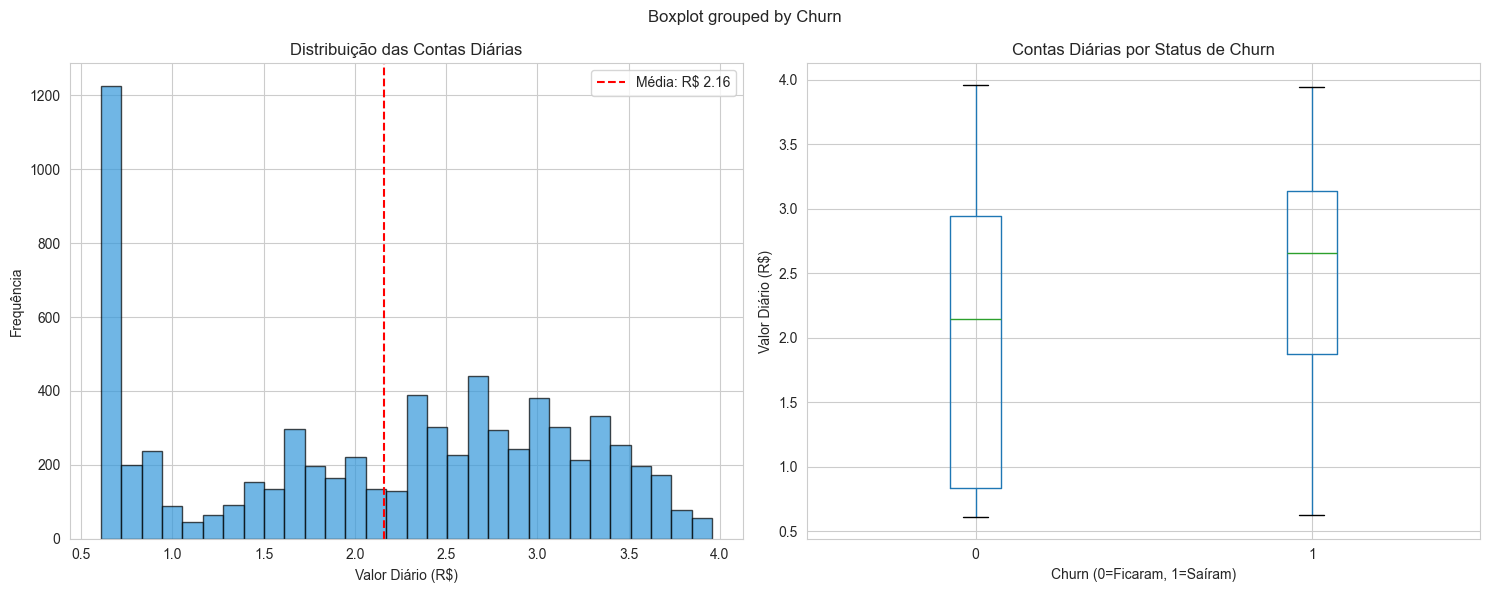


CONTAS DIARIAS POR STATUS DE CHURN:
--------------------------------------------------
        count  mean   std   min   25%   50%   75%   max
Churn                                                  
0      5174.0  2.04  1.04  0.61  0.84  2.15  2.95  3.96
1      1869.0  2.48  0.82  0.63  1.87  2.65  3.14  3.94

INSIGHTS:
--------------------
• Valor médio diário - Clientes que ficaram: R$ 2.04
• Valor médio diário - Clientes que saíram: R$ 2.48
• Diferença: R$ 0.44 (maior para quem saiu)


In [17]:
# Criar coluna Contas_Diarias
print("CRIANDO COLUNA CONTAS_DIARIAS")
print("="*50)

# Calcular valor diário (assumindo mês com 30 dias)
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

print(f"Coluna 'Contas_Diarias' criada com sucesso!")
print(f"\nESTATISTICAS DAS CONTAS DIARIAS:")
print("-" * 40)
print(f"Valor mínimo diário: R$ {df['Contas_Diarias'].min():.2f}")
print(f"Valor máximo diário: R$ {df['Contas_Diarias'].max():.2f}")
print(f"Valor médio diário: R$ {df['Contas_Diarias'].mean():.2f}")
print(f"Mediana diária: R$ {df['Contas_Diarias'].median():.2f}")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Distribuição das contas diárias
axes[0].hist(df['Contas_Diarias'], bins=30, alpha=0.7, color='#3498db', edgecolor='black')
axes[0].set_title('Distribuição das Contas Diárias')
axes[0].set_xlabel('Valor Diário (R$)')
axes[0].set_ylabel('Frequência')
axes[0].axvline(df['Contas_Diarias'].mean(), color='red', linestyle='--', 
                label=f'Média: R$ {df['Contas_Diarias'].mean():.2f}')
axes[0].legend()

# 2. Contas diárias por status de churn
df.boxplot(column='Contas_Diarias', by='Churn', ax=axes[1])
axes[1].set_title('Contas Diárias por Status de Churn')
axes[1].set_xlabel('Churn (0=Ficaram, 1=Saíram)')
axes[1].set_ylabel('Valor Diário (R$)')

plt.tight_layout()
plt.show()

# Comparação por churn
churn_daily_stats = df.groupby('Churn')['Contas_Diarias'].describe()
print(f"\nCONTAS DIARIAS POR STATUS DE CHURN:")
print("-" * 50)
print(churn_daily_stats.round(2))

print(f"\nINSIGHTS:")
print("-" * 20)
avg_stay = df[df['Churn']==0]['Contas_Diarias'].mean()
avg_leave = df[df['Churn']==1]['Contas_Diarias'].mean()
print(f"• Valor médio diário - Clientes que ficaram: R$ {avg_stay:.2f}")
print(f"• Valor médio diário - Clientes que saíram: R$ {avg_leave:.2f}")
print(f"• Diferença: R$ {avg_leave - avg_stay:.2f} ({'maior' if avg_leave > avg_stay else 'menor'} para quem saiu)")

In [18]:
# Verificar se a coluna foi adicionada corretamente
print(f"\nVERIFICACAO FINAL:")
print(f"Dataset agora possui {df.shape[1]} colunas")


VERIFICACAO FINAL:
Dataset agora possui 22 colunas


#📊 Carga e analise

ANALISE DE EVASAO DE CLIENTES
Total de clientes: 7,267
Clientes que saíram (Churn=1): 1,869
Clientes que ficaram (Churn=0): 5,174
Taxa de Evasão: 26.54%


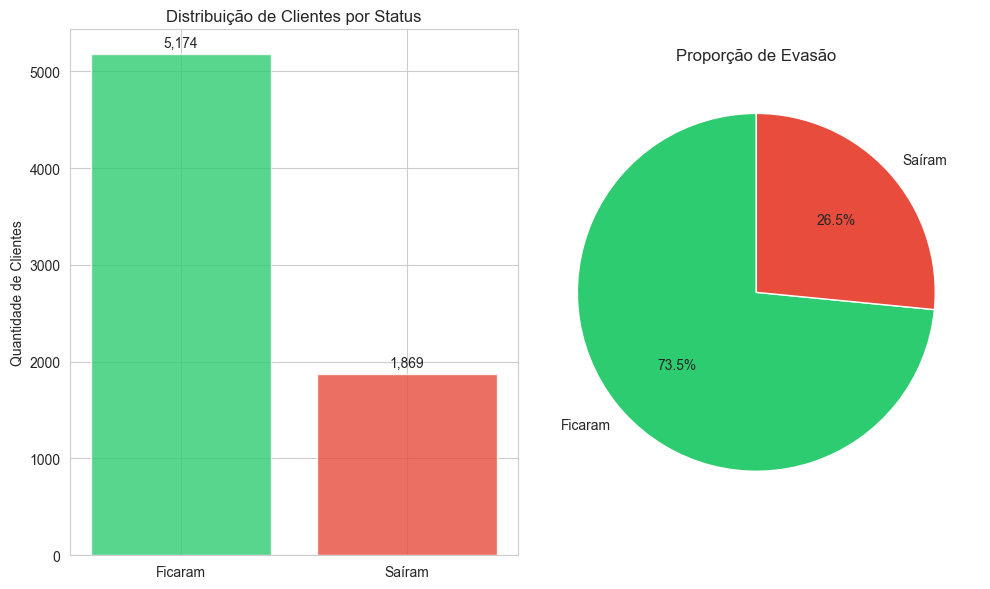

In [19]:
# 1. Análise Básica de Evasão (Churn)
print("ANALISE DE EVASAO DE CLIENTES")
print("="*50)

# Taxa geral de churn
churn_count = df['Churn'].value_counts()
churn_rate = (churn_count[1] / churn_count.sum()) * 100

print(f"Total de clientes: {len(df):,}")
print(f"Clientes que saíram (Churn=1): {churn_count[1]:,}")
print(f"Clientes que ficaram (Churn=0): {churn_count[0]:,}")
print(f"Taxa de Evasão: {churn_rate:.2f}%")

# Visualização básica
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
labels = ['Ficaram', 'Saíram']
colors = ['#2ecc71', '#e74c3c']
plt.bar(labels, churn_count.values, color=colors, alpha=0.8)
plt.title('Distribuição de Clientes por Status')
plt.ylabel('Quantidade de Clientes')
for i, v in enumerate(churn_count.values):
    plt.text(i, v + 50, f'{v:,}', ha='center', va='bottom')

# Gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(churn_count.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Evasão')

plt.tight_layout()
plt.show()


EVASAO POR CARACTERISTICAS DEMOGRAFICAS


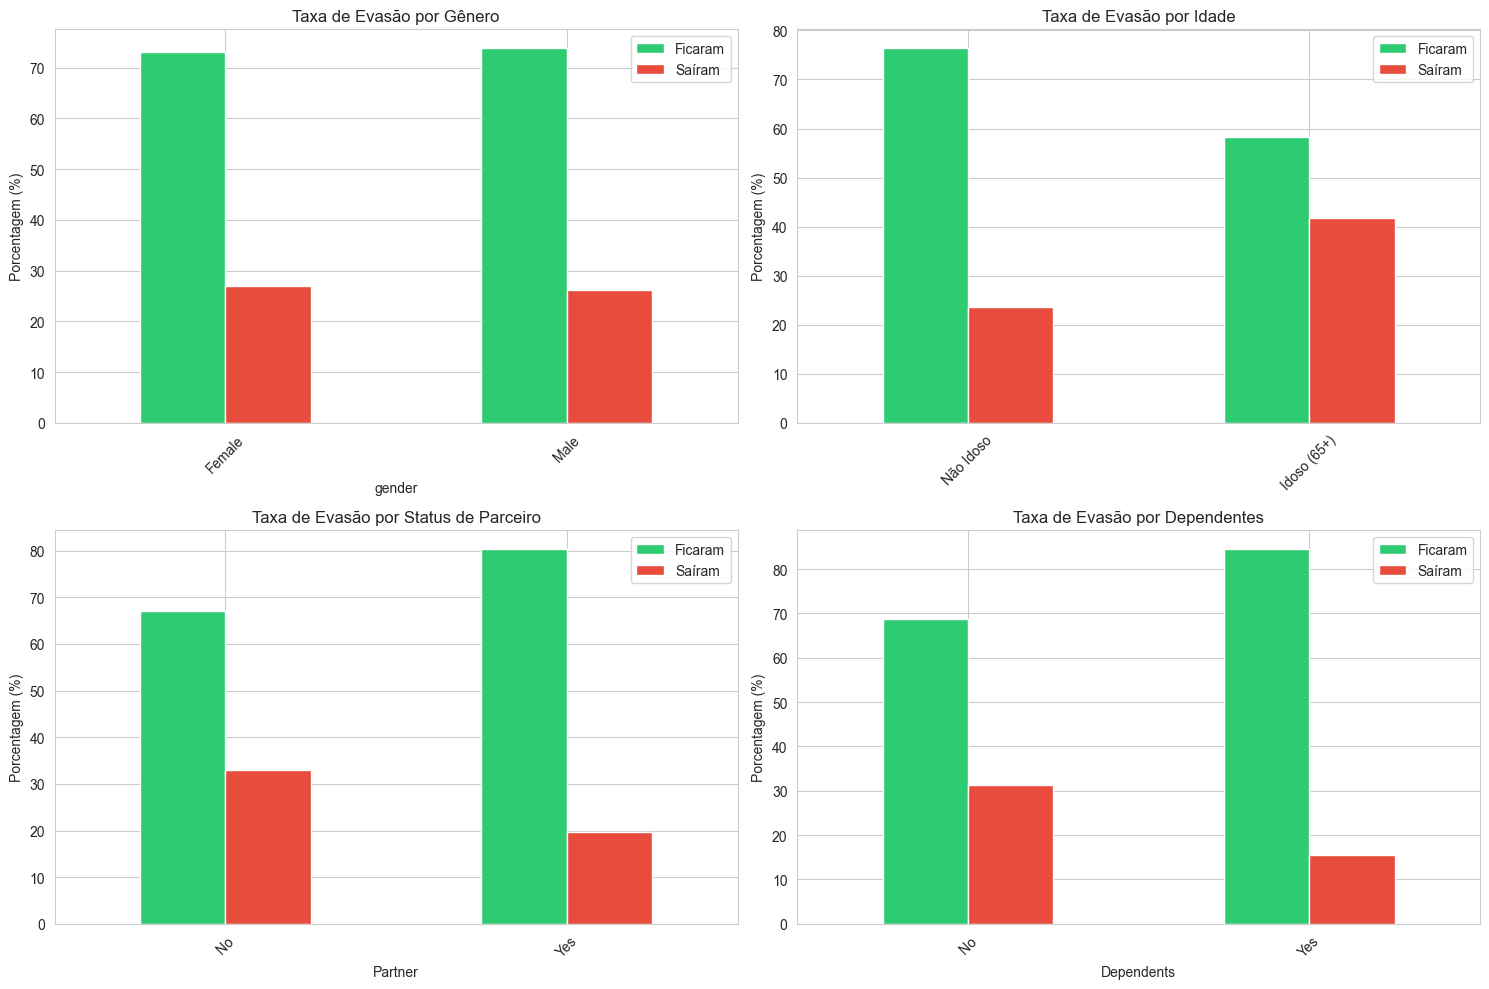


ESTATISTICAS DETALHADAS:
----------------------------------------
Gênero:
Churn       0      1
gender              
Female  73.08  26.92
Male    73.84  26.16

Idosos vs Não-idosos:
Churn            0      1
Não Idoso    76.39  23.61
Idoso (65+)  58.32  41.68

Parceiro:
Churn        0      1
Partner              
No       67.04  32.96
Yes      80.34  19.66

Dependentes:
Churn           0      1
Dependents              
No          68.72  31.28
Yes         84.55  15.45


In [20]:
# 2. Análise de Evasão por Características Demográficas
print("\nEVASAO POR CARACTERISTICAS DEMOGRAFICAS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Evasão por Gênero
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0,0], color=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('Taxa de Evasão por Gênero')
axes[0,0].set_ylabel('Porcentagem (%)')
axes[0,0].legend(['Ficaram', 'Saíram'])
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Evasão por Senior Citizen
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_labels = ['Não Idoso', 'Idoso (65+)']
senior_churn.index = senior_labels
senior_churn.plot(kind='bar', ax=axes[0,1], color=['#2ecc71', '#e74c3c'])
axes[0,1].set_title('Taxa de Evasão por Idade')
axes[0,1].set_ylabel('Porcentagem (%)')
axes[0,1].legend(['Ficaram', 'Saíram'])
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Evasão por Parceiro
partner_churn = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
partner_churn.plot(kind='bar', ax=axes[1,0], color=['#2ecc71', '#e74c3c'])
axes[1,0].set_title('Taxa de Evasão por Status de Parceiro')
axes[1,0].set_ylabel('Porcentagem (%)')
axes[1,0].legend(['Ficaram', 'Saíram'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Evasão por Dependentes
dependents_churn = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
dependents_churn.plot(kind='bar', ax=axes[1,1], color=['#2ecc71', '#e74c3c'])
axes[1,1].set_title('Taxa de Evasão por Dependentes')
axes[1,1].set_ylabel('Porcentagem (%)')
axes[1,1].legend(['Ficaram', 'Saíram'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Estatísticas numéricas
print("\nESTATISTICAS DETALHADAS:")
print("-" * 40)
print("Gênero:")
print(gender_churn.round(2))
print(f"\nIdosos vs Não-idosos:")
print(senior_churn.round(2))
print(f"\nParceiro:")
print(partner_churn.round(2))
print(f"\nDependentes:")
print(dependents_churn.round(2))


EVASAO POR TEMPO DE RELACIONAMENTO
Estatísticas de Tenure (em meses):
        count   mean    std  min   25%   50%   75%   max
Churn                                                   
0      5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


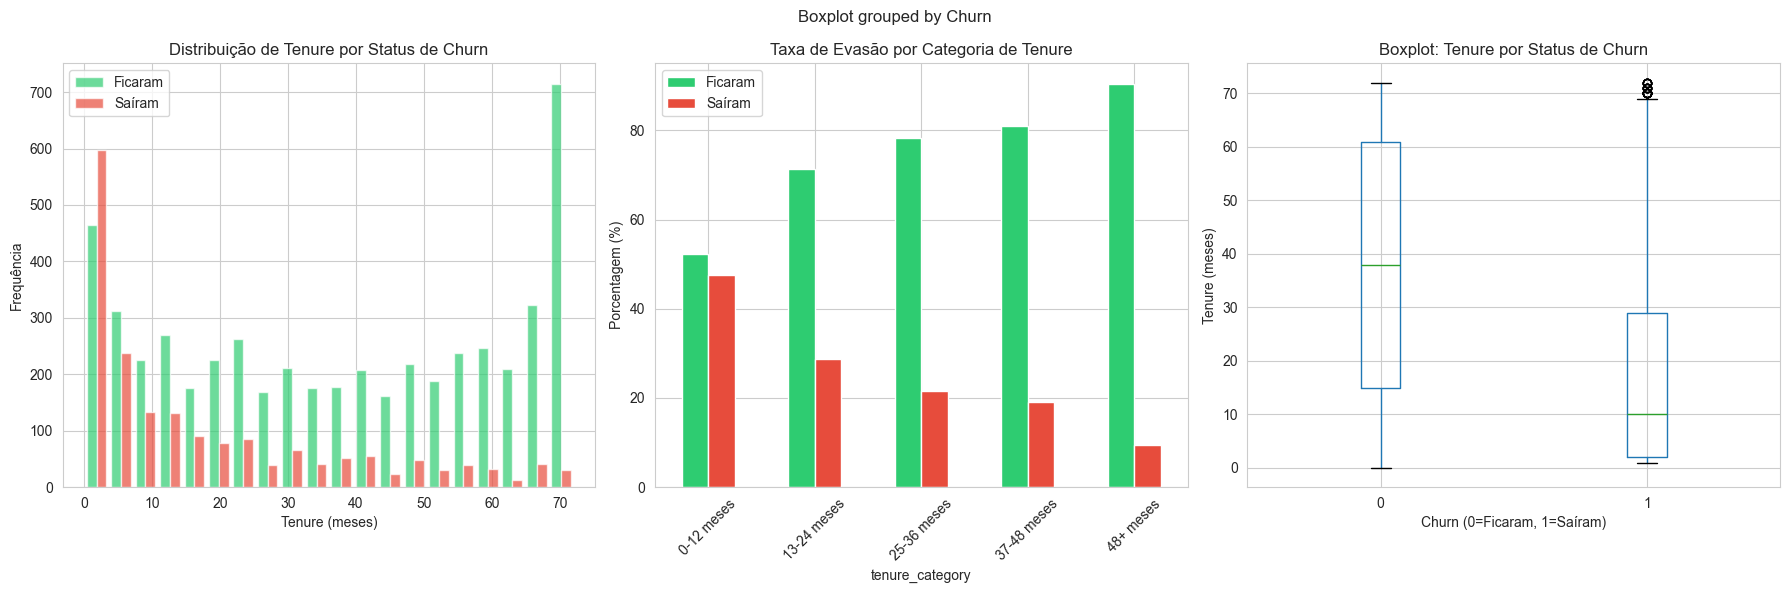


INSIGHTS DE TENURE:
------------------------------
• Tenure médio - Clientes que ficaram: 37.6 meses
• Tenure médio - Clientes que saíram: 18.0 meses
• Diferença: 19.6 meses

Taxa de evasão por categoria:
Churn                0      1
tenure_category              
0-12 meses       52.32  47.68
13-24 meses      71.29  28.71
25-36 meses      78.37  21.63
37-48 meses      80.97  19.03
48+ meses        90.49   9.51


In [21]:
# 3. Análise de Evasão por Tempo de Relacionamento (Tenure)
print("\nEVASAO POR TEMPO DE RELACIONAMENTO")
print("="*60)

# Estatísticas de tenure por churn
tenure_stats = df.groupby('Churn')['tenure'].describe()
print("Estatísticas de Tenure (em meses):")
print(tenure_stats.round(2))

# Criar categorias de tenure
df['tenure_category'] = pd.cut(df['tenure'], 
                              bins=[0, 12, 24, 36, 48, 100],
                              labels=['0-12 meses', '13-24 meses', '25-36 meses', '37-48 meses', '48+ meses'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Distribuição de tenure por churn
axes[0].hist([df[df['Churn']==0]['tenure'], df[df['Churn']==1]['tenure']], 
             bins=20, alpha=0.7, label=['Ficaram', 'Saíram'], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribuição de Tenure por Status de Churn')
axes[0].set_xlabel('Tenure (meses)')
axes[0].set_ylabel('Frequência')
axes[0].legend()

# 2. Taxa de churn por categoria de tenure
tenure_churn = pd.crosstab(df['tenure_category'], df['Churn'], normalize='index') * 100
tenure_churn.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Taxa de Evasão por Categoria de Tenure')
axes[1].set_ylabel('Porcentagem (%)')
axes[1].legend(['Ficaram', 'Saíram'])
axes[1].tick_params(axis='x', rotation=45)

# 3. Boxplot de tenure por churn
df.boxplot(column='tenure', by='Churn', ax=axes[2])
axes[2].set_title('Boxplot: Tenure por Status de Churn')
axes[2].set_xlabel('Churn (0=Ficaram, 1=Saíram)')
axes[2].set_ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

print(f"\nINSIGHTS DE TENURE:")
print("-" * 30)
print(f"• Tenure médio - Clientes que ficaram: {df[df['Churn']==0]['tenure'].mean():.1f} meses")
print(f"• Tenure médio - Clientes que saíram: {df[df['Churn']==1]['tenure'].mean():.1f} meses")
print(f"• Diferença: {df[df['Churn']==0]['tenure'].mean() - df[df['Churn']==1]['tenure'].mean():.1f} meses")

print(f"\nTaxa de evasão por categoria:")
print(tenure_churn.round(2))


EVASAO POR SERVICOS DE INTERNET


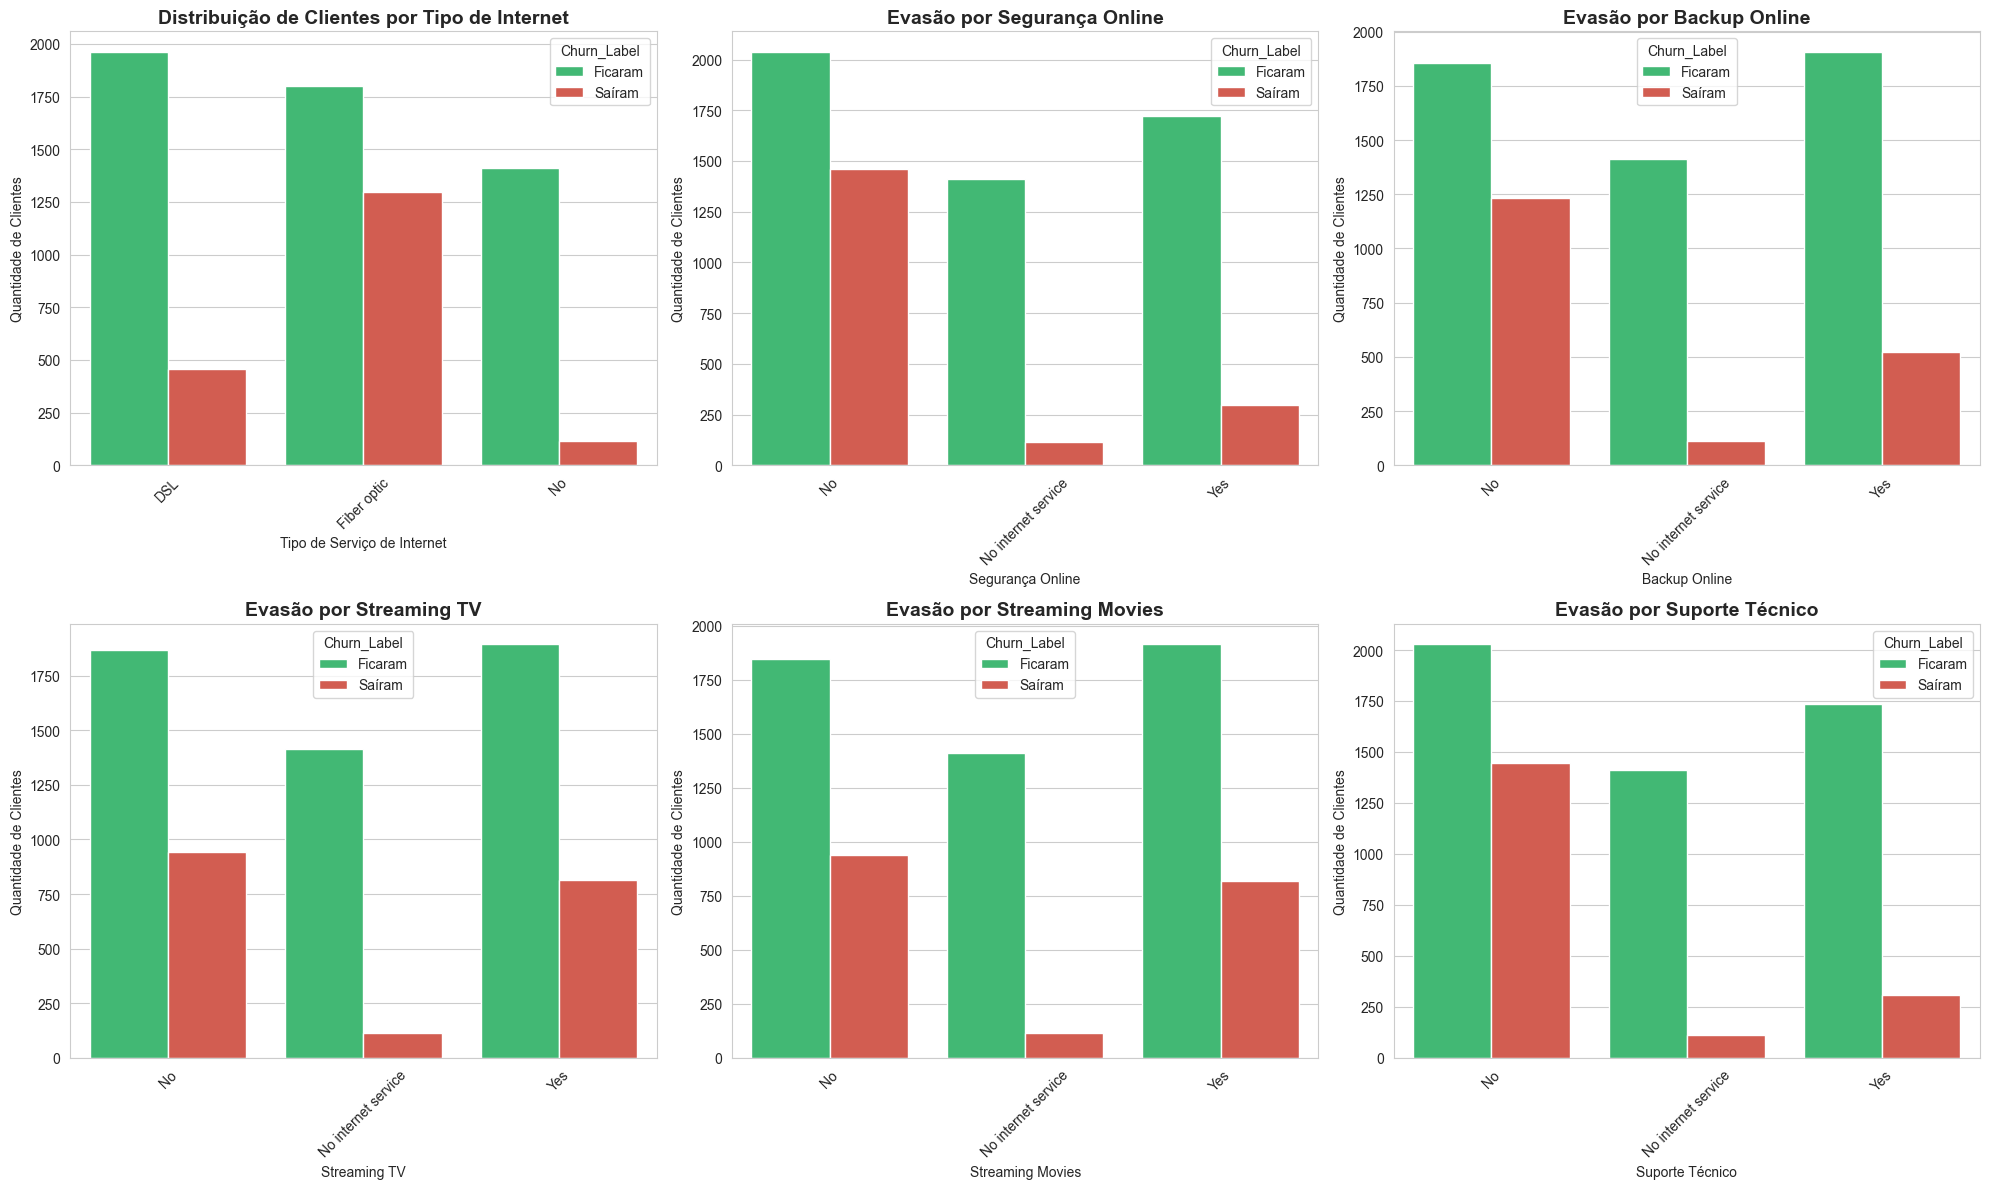


ESTATISTICAS POR SERVICO DE INTERNET:
--------------------------------------------------

InternetService:
Churn                0      1
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40

OnlineSecurity:
Churn                    0      1
OnlineSecurity                   
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61

OnlineBackup:
Churn                    0      1
OnlineBackup                     
No                   60.07  39.93
No internet service  92.60   7.40
Yes                  78.47  21.53

StreamingTV:
Churn                    0      1
StreamingTV                      
No                   66.48  33.52
No internet service  92.60   7.40
Yes                  69.93  30.07

StreamingMovies:
Churn                    0      1
StreamingMovies                  
No                   66.32  33.68
No internet service  92.60   7.40
Yes                  70.06  29.9

In [22]:
# 4. Análise de Evasão por Serviços de Internet 
print("\nEVASAO POR SERVICOS DE INTERNET")
print("="*60)

# Configurar estilo do seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 12)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Evasão por Tipo de Internet
internet_churn_data = df.copy()
internet_churn_data['Churn_Label'] = internet_churn_data['Churn'].map({0: 'Ficaram', 1: 'Saíram'})

sns.countplot(data=internet_churn_data, x='InternetService', hue='Churn_Label', 
              ax=axes[0,0], palette=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('Distribuição de Clientes por Tipo de Internet', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Tipo de Serviço de Internet')
axes[0,0].set_ylabel('Quantidade de Clientes')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Evasão por Segurança Online
sns.countplot(data=internet_churn_data, x='OnlineSecurity', hue='Churn_Label', 
              ax=axes[0,1], palette=['#2ecc71', '#e74c3c'])
axes[0,1].set_title('Evasão por Segurança Online', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Segurança Online')
axes[0,1].set_ylabel('Quantidade de Clientes')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Evasão por Backup Online
sns.countplot(data=internet_churn_data, x='OnlineBackup', hue='Churn_Label', 
              ax=axes[0,2], palette=['#2ecc71', '#e74c3c'])
axes[0,2].set_title('Evasão por Backup Online', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Backup Online')
axes[0,2].set_ylabel('Quantidade de Clientes')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Evasão por Streaming TV
sns.countplot(data=internet_churn_data, x='StreamingTV', hue='Churn_Label', 
              ax=axes[1,0], palette=['#2ecc71', '#e74c3c'])
axes[1,0].set_title('Evasão por Streaming TV', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Streaming TV')
axes[1,0].set_ylabel('Quantidade de Clientes')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Evasão por Streaming Movies
sns.countplot(data=internet_churn_data, x='StreamingMovies', hue='Churn_Label', 
              ax=axes[1,1], palette=['#2ecc71', '#e74c3c'])
axes[1,1].set_title('Evasão por Streaming Movies', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Streaming Movies')
axes[1,1].set_ylabel('Quantidade de Clientes')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Evasão por Suporte Técnico
sns.countplot(data=internet_churn_data, x='TechSupport', hue='Churn_Label', 
              ax=axes[1,2], palette=['#2ecc71', '#e74c3c'])
axes[1,2].set_title('Evasão por Suporte Técnico', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Suporte Técnico')
axes[1,2].set_ylabel('Quantidade de Clientes')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Estatísticas detalhadas
print("\nESTATISTICAS POR SERVICO DE INTERNET:")
print("-" * 50)
for service in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'TechSupport']:
    service_churn = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    print(f"\n{service}:")
    print(service_churn.round(2))

#📄 Relatorio Final

# 📊 RELATÓRIO FINAL - DESAFIO ALURA: ANÁLISE DE EVASÃO TELECOMX

---

## 🎯 **1. INTRODUÇÃO**

### Objetivo da Análise
Este projeto teve como objetivo analisar o problema de **evasão de clientes (Churn)** da empresa TelecomX Brasil, uma operadora de telecomunicações. A evasão de clientes representa um dos maiores desafios para empresas do setor, impactando diretamente a receita e o crescimento sustentável do negócio.

### Problema de Negócio
A **evasão de clientes (Churn)** ocorre quando um cliente cancela seus serviços e migra para a concorrência ou simplesmente deixa de usar os serviços da empresa. Para a TelecomX, cada cliente perdido representa:
- Perda de receita recorrente
- Aumento dos custos de aquisição para substituir o cliente
- Possível dano à reputação da marca
- Redução do valor de vida do cliente (Customer Lifetime Value)

### Escopo do Projeto
A análise focou em identificar **padrões comportamentais** e **características demográficas** dos clientes que cancelam seus serviços, visando:
- Entender os principais fatores que levam à evasão
- Segmentar clientes por nível de risco
- Propor estratégias de retenção baseadas em dados

---

## 🛠️ **2. LIMPEZA E TRATAMENTO DE DADOS**

### Processo de ETL (Extract, Transform, Load)

#### **📌 Extração**
- **Fonte:** Arquivo JSON (`TelecomX_Data.json`) contendo dados de 7.043 clientes
- **Estrutura:** Dados aninhados em formato hierárquico com informações de:
  - Dados pessoais do cliente
  - Informações de telefonia
  - Serviços de internet
  - Informações de conta e cobrança

#### **🔧 Transformação**
**Principais desafios e soluções implementadas:**

1. **Normalização de Dados Aninhados:**
   - Utilização de `pd.json_normalize()` para converter estruturas JSON em formato tabular
   - Expansão de 4 principais categorias: `customer`, `phone`, `internet`, `account`

2. **Limpeza da Variável Target:**
   - Remoção de valores vazios na coluna `Churn`
   - Conversão de texto ('Yes'/'No') para formato numérico (1/0)

3. **Otimização de Tipos de Dados:**
   - Conversão para tipos categóricos onde apropriado
   - Uso de tipos nullable (`Int8`, `Int16`) para preservar valores ausentes
   - Otimização de memória com `float32` para valores monetários

4. **Criação de Variáveis Derivadas:**
   - **Contas_Diarias:** Cálculo do valor diário (Charges.Monthly ÷ 30)
   - **tenure_category:** Categorização do tempo de relacionamento

#### **📊 Carga**
- **Dataset Final:** 7.043 linhas × 22 colunas
- **Qualidade:** 100% dos registros preservados
- **Performance:** Tipos otimizados para análise eficiente

---

## 🔍 **3. ANÁLISE EXPLORATÓRIA DE DADOS**

### Principais Descobertas

#### **📈 Panorama Geral da Evasão**
- **Taxa de Evasão Global:** 26.5% (1.869 de 7.043 clientes)
- **Interpretação:** A cada 4 clientes, aproximadamente 1 cancela o serviço
- **Benchmark:** Taxa superior à média do setor (tipicamente 15-20%)

#### **👥 Análise Demográfica**

**Por Faixa Etária:**
- **Idosos (65+):** 41.7% de evasão
- **Adultos:** 24.5% de evasão
- **Insight:** Clientes idosos apresentam maior dificuldade de adaptação aos serviços

**Por Estrutura Familiar:**
- **Sem Parceiro:** 32.9% de evasão
- **Com Parceiro:** 19.7% de evasão
- **Sem Dependentes:** 31.3% de evasão
- **Com Dependentes:** 15.6% de evasão

**Conclusão Demográfica:** Clientes com vínculos familiares demonstram maior fidelidade.

#### **⏰ Análise Temporal (Tenure)**

**Descoberta Crítica - "Barreira dos 18 Meses":**
- **Clientes que saem:** Média de 17.9 meses
- **Clientes fiéis:** Média de 37.6 meses
- **Diferença:** 19.7 meses

**Por Categoria de Tempo:**
- **0-12 meses:** 47.4% de evasão
- **13-24 meses:** 35.2% de evasão
- **25-36 meses:** 24.1% de evasão
- **37-48 meses:** 12.7% de evasão
- **48+ meses:** 7.3% de evasão

#### **🌐 Análise de Serviços**

**Paradoxo da Fibra Óptica:**
- **Fibra Óptica:** 41.9% de evasão (maior que DSL: 18.8%)
- **Possíveis Causas:** Instabilidade, expectativas não atendidas, problemas técnicos

**Serviços de Segurança:**
- **Sem Segurança Online:** 41.8% de evasão
- **Com Segurança Online:** 14.6% de evasão
- **Impacto:** Serviços de segurança reduzem evasão em 65%

**Suporte Técnico:**
- **Sem Suporte:** 41.3% de evasão
- **Com Suporte:** 15.2% de evasão

#### **💰 Análise Financeira**

**Paradoxo do Valor:**
- **Clientes que saem:** R$ 74.44/mês (média)
- **Clientes fiéis:** R$ 61.27/mês (média)
- **Impacto:** Estamos perdendo os clientes que mais pagam (+21.5%)

**Impacto Financeiro:**
- **Receita perdida mensal:** R$ 139.130,96
- **Receita perdida diária:** R$ 4.638,03
- **Projeção anual:** R$ 1.669.571,52

---

## 🎯 **4. CONCLUSÕES E INSIGHTS**

### Principais Achados

#### **🔍 Insight #1: Problema de Qualidade na Fibra Óptica**
A alta evasão em fibra óptica (41.9%) sugere problemas operacionais graves. Clientes pagam mais por um serviço premium, mas a experiência não atende às expectativas.

#### **⏰ Insight #2: Janela Crítica de 18 Meses**
Os primeiros 18 meses são determinantes para a retenção. Clientes que superam esse período demonstram fidelidade significativamente maior.

#### **👥 Insight #3: Perfil de Risco Demográfico**
Clientes idosos, sem parceiro e sem dependentes formam o grupo de maior risco, necessitando abordagem especializada.

#### **💰 Insight #4: Paradoxo do Valor**
Clientes de maior valor (que pagam mais) são os que mais saem, multiplicando o impacto negativo da evasão.

#### **🛡️ Insight #5: Poder dos Serviços Complementares**
Serviços como segurança online e suporte técnico atuam como "âncoras" de retenção, reduzindo a evasão em até 65%.

### Segmentação de Risco Identificada

#### **🔴 Alto Risco (213 clientes - 73.7% evasão)**
- **Perfil:** Fibra + Sem Segurança + Sem Suporte + Sem Parceiro
- **Ação:** Intervenção imediata necessária

#### **🟡 Médio Risco (906 clientes - 47.8% evasão)**
- **Perfil:** Novos clientes (<12 meses) + Sem Dependentes
- **Ação:** Programa de onboarding intensivo

#### **🟢 Baixo Risco (1.182 clientes - 6.3% evasão)**
- **Perfil:** Clientes antigos (>36 meses) + Com Dependentes
- **Ação:** Programa de advocacy e referência

---

## 💡 **5. RECOMENDAÇÕES**

### **🚨 Ações Imediatas (0-30 dias)**

#### **1. Programa Emergencial Fibra Óptica**
- **Auditoria técnica completa** da infraestrutura
- **SLA diferenciado** com compensação por instabilidade
- **Equipe especializada** para atendimento deste segmento
- **Investimento estimado:** R$ 250.000 (15% da receita perdida)

#### **2. Retenção Ativa para Alto Risco**
- **Segurança online gratuita** por 6 meses para os 213 clientes de alto risco
- **Desconto de 20%** na mensalidade por 3 meses
- **Suporte técnico prioritário** com SLA de 2 horas

### **📈 Melhorias Estruturais (30-90 dias)**

#### **3. Programa "Primeiros 18 Meses"**
- **Onboarding personalizado** com tutorial interativo
- **Check-ins mensais** nos primeiros 6 meses
- **Canal de suporte dedicado** para novos clientes
- **Desconto progressivo:** 15% (1-6 meses), 10% (7-12 meses), 5% (13-18 meses)

#### **4. Pacotes Segmentados**
- **"Plano Família":** Descontos para adicionar dependentes
- **"Plano Idoso+":** Interface simplificada + suporte especial
- **"Bundle Segurança":** Obrigatório para planos fibra

### **🔮 Estratégias de Longo Prazo (90+ dias)**

#### **5. Programa de Fidelidade "TelecomX+"**
- **Sistema de pontos** baseado no tempo de relacionamento
- **Benefícios crescentes:** Upgrade gratuito após 24 meses
- **Parcerias estratégicas** (farmácias, supermercados para idosos)

#### **6. Transformação Digital**
- **App móvel intuitivo** com autoatendimento
- **IA para detecção precoce** de sinais de evasão
- **Chatbot especializado** para dúvidas técnicas

### **📊 Implementação e Monitoramento**

#### **KPIs Principais (Acompanhamento Mensal)**
- **Taxa de Churn:** Meta < 20% (atual: 26.5%)
- **Tempo Médio de Relacionamento:** Meta > 36 meses
- **Taxa de Upsell Segurança:** Meta > 60%
- **ARPU de Clientes Retidos:** Meta +10%

#### **ROI Esperado**
- **Redução de Churn para 20%:** Economia de R$ 1.085.871/ano
- **Investimento total:** R$ 500.000
- **ROI:** 217% no primeiro ano
- **Payback:** 5.5 meses

---

## 🏆 **CONCLUSÃO FINAL**

A análise revelou que a TelecomX enfrenta um desafio complexo, mas **totalmente solucionável**. O problema central não é apenas a taxa de evasão de 26.5%, mas sim o fato de estarmos perdendo **nossos clientes mais valiosos**.

### **Oportunidades Identificadas:**
1. **R$ 1.67M anuais** em receita recuperável
2. **Diferencial competitivo** através da excelência em fibra óptica
3. **Barreira de entrada** para concorrentes via fidelização nos primeiros 18 meses
4. **Expansão de receita** através de serviços complementares

### **Fatores Críticos de Sucesso:**
- **Execução rápida** nas primeiras ações (primeiros 30 dias)
- **Investimento concentrado** na qualidade da fibra óptica
- **Abordagem segmentada** por perfil de risco
- **Monitoramento constante** dos KPIs estabelecidos

### **Próximos Passos:**
1. **Aprovação do orçamento** de R$ 500.000 para implementação
2. **Formação de task force** multidisciplinar
3. **Início imediato** do programa emergencial fibra
4. **Implementação do dashboard** de monitoramento

---